<a href="https://colab.research.google.com/github/Bmartins25/Supervised_Decision_tree/blob/main/Decision_tree_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

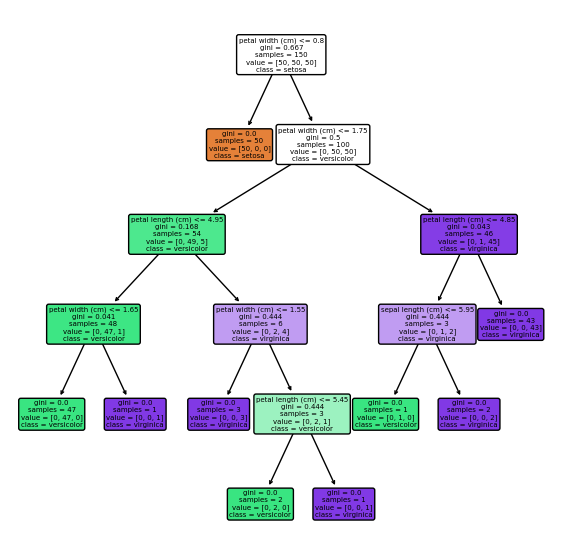

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



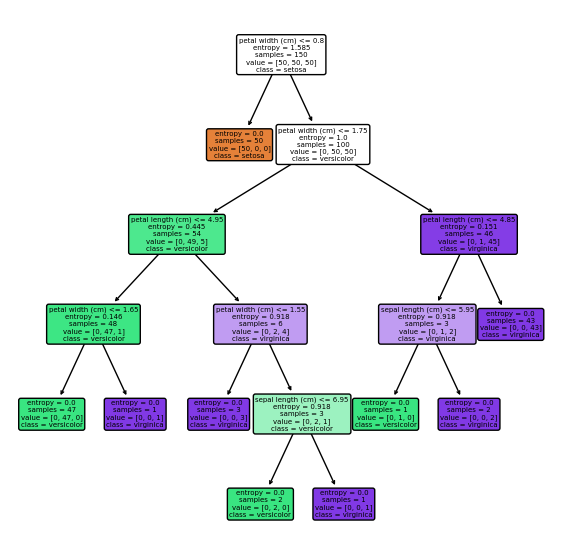

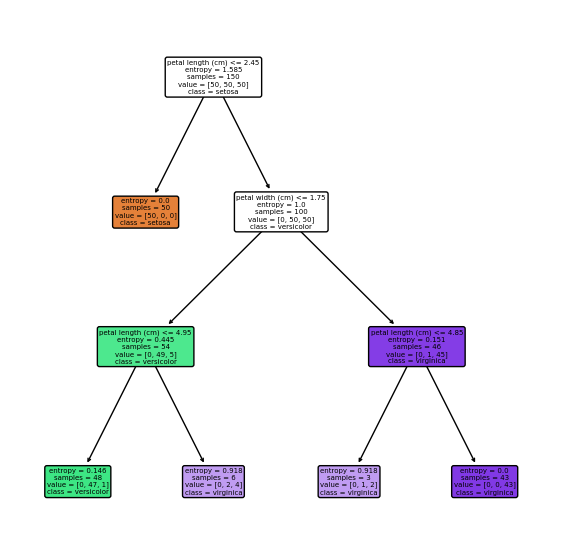

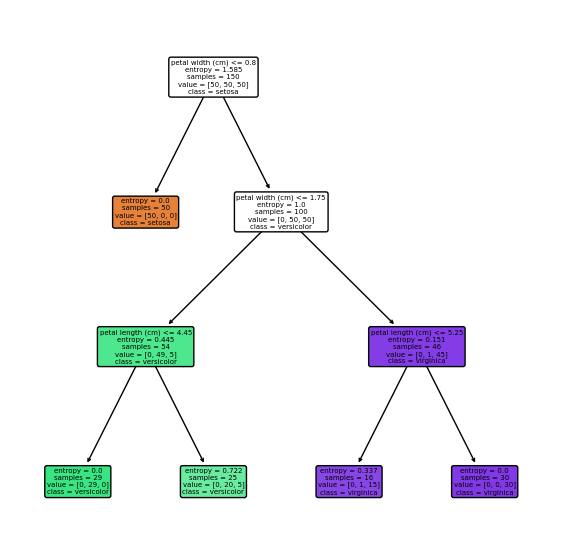

<ipython-input-1-9ee1acbc40a9>:138: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-9ee1acbc40a9>:138: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-9ee1acbc40a9>:138: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-9ee1acbc40a9>:138: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-9ee1acbc40a9>:138: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

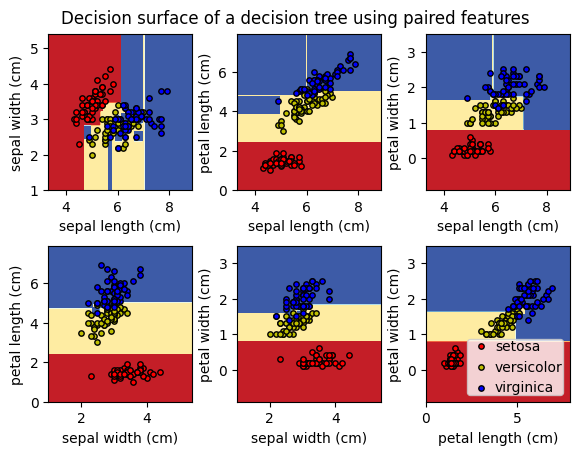

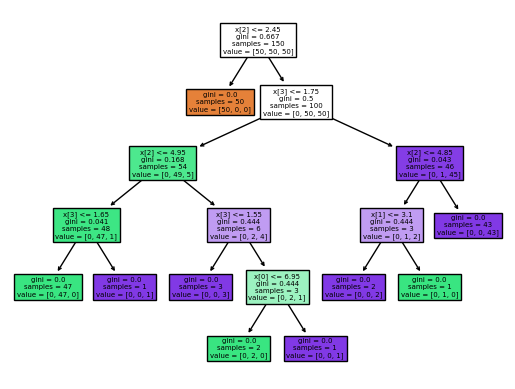

In [1]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.tree import export_text
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


#Carregando os dados de iris em um array de dimensão (150,4) e um array de dimensao 150


X,y = load_iris(return_X_y=True )
iris =load_iris( )
iris.feature_names
#Gera um objeto classificador
clf = DecisionTreeClassifier()
#Realiza uma ajuste com as opções padrões


clf = clf.fit(X,y)
#Numero de folhas
clf.get_n_leaves()
#Profundidade
clf.get_depth()
#Obtem os parametros repassados. Nesse caso, por exemplo
#'criterion': 'gini', #'max_depth':5,n_leaves:9

#plotando a arvore de decisão com a função padrão do sklearn
plt.figure( figsize=(7,7),dpi=100)
plot_tree(clf,feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.show()


#Outra opção usando graphviz. Posssui melhores opções para rederizar o gráfico
dot_data = export_graphviz(clf, out_file=None,
                      feature_names=iris.feature_names,
                      #class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)


graph = graphviz.Source(dot_data)
#gera um texto com um resumo das regras de decisão
r = export_text(clf, feature_names=iris['feature_names'] )
print(r)


#plota a árvore de decisão
graph


#Plotando com outros parâmetros
#entropy como criterion
plt.figure( figsize=(7,7),dpi=100)
plot_tree( DecisionTreeClassifier( criterion="entropy" ).fit(X,y) ,
          feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True, fontsize=5.0
                    )
plt.show()


#entropy como criterion e max_depth de 3
plt.figure( figsize=(7,7),dpi=100)
plot_tree( DecisionTreeClassifier( criterion="entropy" ,    max_depth=3).fit(X,y) ,
          feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True, fontsize=5.0
                    )
plt.show()


#entropy como criterion e max_depth de 3 e também min_samples_leaf=15
plt.figure( figsize=(7,7),dpi=100)
plot_tree( DecisionTreeClassifier( criterion="entropy" ,    min_samples_leaf=15).fit(X,y) ,
          feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.show()


##Fonte https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


# Load data
iris = load_iris()


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target


    # Train
    clf = DecisionTreeClassifier().fit(X, y)


    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])


    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")


plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


iris = load_iris()
max_depth_dt = [2,3,4,5,2,3,4,5 ]
criterion_dt = ["entropy","entropy","entropy","entropy","gini","gini","gini","gini"]


for i,max_depth,criterion in zip(range(8),max_depth_dt,criterion_dt):
    X = iris.data
    y = iris.target


    # Train
    clf = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth).fit(X, y)

    y_pred = clf.predict(X)
    acuracia = accuracy_score(y, y_pred)*100


    print("Criterio",criterion,"Max prof = ",max_depth,"Acurácia =",acuracia,"%.")


Criterio entropy Max prof =  2 Acurácia = 96.0 %.
Criterio entropy Max prof =  3 Acurácia = 97.33333333333334 %.
Criterio entropy Max prof =  4 Acurácia = 99.33333333333333 %.
Criterio entropy Max prof =  5 Acurácia = 100.0 %.
Criterio gini Max prof =  2 Acurácia = 96.0 %.
Criterio gini Max prof =  3 Acurácia = 97.33333333333334 %.
Criterio gini Max prof =  4 Acurácia = 99.33333333333333 %.
Criterio gini Max prof =  5 Acurácia = 100.0 %.
